In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [34]:
A = pd.read_csv("House-Price.csv")
A.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [35]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
Sold           506 non-null int64
dtypes: float64(14), int64(2), object(3)
memory usage: 69.2+ KB


In [36]:
A.isna().sum()
# na in n_hos_beds

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
Sold           0
dtype: int64

In [37]:
# sold is actually categorical but it shows integer type
# we can either convert to string_type, or
# map 0 as no and 1 as yes (as done for "airport" below)


A['Sold'] = A['Sold'].astype('str')

#just converting to yes and no anyway
A['Sold'] = A['Sold'].map({'0': 'NO', '1': 'YES'})
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
price          506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
dist1          506 non-null float64
dist2          506 non-null float64
dist3          506 non-null float64
dist4          506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null object
n_hos_beds     498 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
bus_ter        506 non-null object
parks          506 non-null float64
Sold           506 non-null object
dtypes: float64(14), int64(1), object(4)
memory usage: 67.3+ KB


2
YES    279
NO     227
Name: airport, dtype: int64
YES    55.1
NO     44.9
Name: airport, dtype: float64


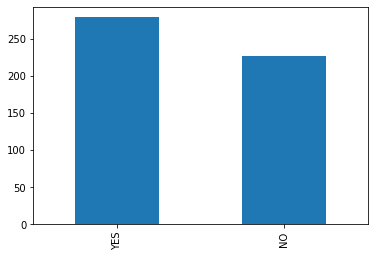

In [38]:
#Now, first lets deal with the categorical variables

#airport

print(A['airport'].nunique())

print(A['airport'].value_counts())

print(A['airport'].value_counts(normalize = True).mul(100).round(1))


A['airport'].value_counts().plot(kind = 'bar')

In [39]:
#replace YES for 1 and NO for 0
A['airport'] = A['airport'].map({'YES': 1, 'NO': 0})

print(A['airport'].value_counts(normalize = True).mul(100).round(1))


1    55.1
0    44.9
Name: airport, dtype: float64


In [40]:
A['bus_ter'].value_counts()

YES    506
Name: bus_ter, dtype: int64

In [41]:
#drop this
A = A.drop('bus_ter', axis = 1)
A.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,River,23,0.049347,NO
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,Lake,42,0.046146,YES
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,None,38,0.045764,NO
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,Lake,45,0.047151,NO
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,Lake,55,0.039474,NO


In [42]:
### we have 4 distances, so lets just take an average
A["avg_dist"] = A[["dist1","dist2","dist3","dist4"]].mean(axis=1)
A.drop(["dist1","dist2","dist3","dist4"], axis = 1, inplace = True)
A.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.1920,River,23,0.049347,NO,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.1728,Lake,42,0.046146,YES,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,101.1200,None,38,0.045764,NO,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.2672,Lake,45,0.047151,NO,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.2896,Lake,55,0.039474,NO,6.0625


In [43]:
###### check for outliers

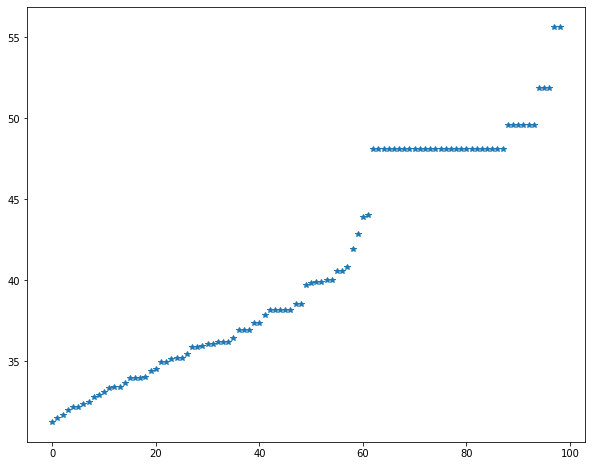

In [44]:
# resid_area

#first, created a percentile frame
p=[]
for i in range(1,100):
    xyz = (A['resid_area'].quantile(i/100))
    p.append(xyz)
p = pd.DataFrame(p)

plt.figure(figsize=(10,8))
plt.plot(p, '*')

#no outliers

In [45]:
### treating NAs in n_hos_beds
print(A['n_hos_beds'].describe())

print(A['n_hos_beds'].isna().sum())

count    498.000000
mean       7.899767
std        1.476683
min        5.268000
25%        6.634500
50%        7.999000
75%        9.088000
max       10.876000
Name: n_hos_beds, dtype: float64
8


In [46]:
#will print those rows for which n_hos_beds has NAs

A[A.isna().any(axis = 1)]


,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
50,19.7,35.64,0.439,5.963,45.7,23.2,13.45,1,NaN,11.1576,River,21,0.040389,YES,6.8150
112,18.8,40.01,0.547,5.913,92.9,22.2,16.21,1,NaN,15.1504,River,35,0.057644,NO,2.3525
215,25.0,40.59,0.489,6.182,42.4,21.4,9.47,1,NaN,12.2000,Lake,30,0.047925,NO,3.9475
260,33.8,33.97,0.647,7.203,81.8,27.0,9.59,1,NaN,11.2704,Lake,21,0.068041,YES,2.1125
359,22.6,48.10,0.770,6.112,81.3,19.8,12.67,0,NaN,14.1808,Lake,26,0.074239,NO,2.5075
403,8.3,48.10,0.693,5.349,96.0,19.8,19.77,1,NaN,15.0664,River,40,0.067689,YES,1.7025
416,7.5,48.10,0.679,6.782,90.8,19.8,25.79,1,NaN,10.0600,River,35,0.064619,YES,1.8200
496,19.7,39.69,0.585,5.390,72.9,20.8,21.14,0,NaN,12.1576,River,44,0.061026,NO,2.7975


In [47]:
A['n_hos_beds'].describe()

count    498.000000
mean       7.899767
std        1.476683
min        5.268000
25%        6.634500
50%        7.999000
75%        9.088000
max       10.876000
Name: n_hos_beds, dtype: float64

In [48]:
A['n_hos_beds'] = np.where(A['n_hos_beds'].isna() == True, A['n_hos_beds'].median(), A['n_hos_beds'])
A['n_hos_beds'].isna().sum()

0

In [49]:
A.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.1920,River,23,0.049347,NO,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.1728,Lake,42,0.046146,YES,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,101.1200,None,38,0.045764,NO,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.2672,Lake,45,0.047151,NO,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.2896,Lake,55,0.039474,NO,6.0625


### End of EDA

# Scaling the continuous variables

In [50]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
price          506 non-null float64
resid_area     506 non-null float64
air_qual       506 non-null float64
room_num       506 non-null float64
age            506 non-null float64
teachers       506 non-null float64
poor_prop      506 non-null float64
airport        506 non-null int64
n_hos_beds     506 non-null float64
n_hot_rooms    506 non-null float64
waterbody      506 non-null object
rainfall       506 non-null int64
parks          506 non-null float64
Sold           506 non-null object
avg_dist       506 non-null float64
dtypes: float64(11), int64(2), object(2)
memory usage: 55.4+ KB


In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

A_cont = A.drop(['Sold','waterbody'], axis = 1)

A_cont = sc.fit_transform(A_cont)

print(A.head())
A_cont = pd.DataFrame(A_cont,columns=['price','resid_area','air_qual','room_num','age','teachers','poor_prop','airport','n_hos_beds','n_hot_rooms','rainfall','parks','avg_dist'])
A_cont.head()

   price  resid_area  air_qual  room_num   age  teachers  poor_prop  airport  \
0   24.0       32.31     0.538     6.575  65.2      24.7       4.98        1   
1   21.6       37.07     0.469     6.421  78.9      22.2       9.14        0   
2   34.7       37.07     0.469     7.185  61.1      22.2       4.03        0   
3   33.4       32.18     0.458     6.998  45.8      21.3       2.94        1   
4   36.2       32.18     0.458     7.147  54.2      21.3       5.33        0   

   n_hos_beds  n_hot_rooms waterbody  rainfall     parks Sold  avg_dist  
0       5.480      11.1920     River        23  0.049347   NO    4.0875  
1       7.332      12.1728      Lake        42  0.046146  YES    4.9675  
2       7.394     101.1200      None        38  0.045764   NO    4.9675  
3       9.268      11.2672      Lake        45  0.047151   NO    6.0650  
4       8.824      11.2896      Lake        55  0.039474   NO    6.0625  


,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
0,0.160376,-1.287909,-0.144217,0.413672,-0.120013,1.459000,-1.075562,0.902009,-1.654434,-0.353398,-1.294408,-0.480763,0.138986
1,-0.101258,-0.593381,-0.740262,0.194274,0.367166,0.303094,-0.492439,-1.108637,-0.389012,-0.166000,0.225431,-0.782183,0.557282
2,1.326830,-0.593381,-0.740262,1.282714,-0.265812,0.303094,-1.208727,-1.108637,-0.346649,16.828839,-0.094535,-0.818115,0.557282
3,1.185112,-1.306878,-0.835284,1.016303,-0.809889,-0.113032,-1.361517,0.902009,0.933805,-0.339029,0.465405,-0.687571,1.078962
4,1.490352,-1.306878,-0.835284,1.228577,-0.511180,-0.113032,-1.026501,-1.108637,0.630432,-0.334750,1.265320,-1.410280,1.077774


In [52]:
# now create dummy variables for the two categorical columns from A 

A_cat = A[['waterbody','Sold']]

#now dummy this
A_cat_dum = pd.get_dummies(A_cat[['waterbody','Sold']], drop_first = True) 
A_cat_dum.head()

,waterbody_Lake and River,waterbody_None,waterbody_River,Sold_YES
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,0
4,0,0,0,0


In [53]:
# Now concatenate A_cat and A_cat_dum

A_master = pd.concat([A_cont,A_cat_dum],axis=1)
A_master.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,waterbody_Lake and River,waterbody_None,waterbody_River,Sold_YES
0,0.160376,-1.287909,-0.144217,0.413672,-0.120013,1.459000,-1.075562,0.902009,-1.654434,-0.353398,-1.294408,-0.480763,0.138986,0,0,1,0
1,-0.101258,-0.593381,-0.740262,0.194274,0.367166,0.303094,-0.492439,-1.108637,-0.389012,-0.166000,0.225431,-0.782183,0.557282,0,0,0,1
2,1.326830,-0.593381,-0.740262,1.282714,-0.265812,0.303094,-1.208727,-1.108637,-0.346649,16.828839,-0.094535,-0.818115,0.557282,0,1,0,0
3,1.185112,-1.306878,-0.835284,1.016303,-0.809889,-0.113032,-1.361517,0.902009,0.933805,-0.339029,0.465405,-0.687571,1.078962,0,0,0,0
4,1.490352,-1.306878,-0.835284,1.228577,-0.511180,-0.113032,-1.026501,-1.108637,0.630432,-0.334750,1.265320,-1.410280,1.077774,0,0,0,0


## Splitting into train and test

In [54]:
A_master.columns

Index(['price', 'resid_area', 'air_qual', 'room_num', 'age', 'teachers',
       'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms', 'rainfall',
       'parks', 'avg_dist', 'waterbody_Lake and River', 'waterbody_None',
       'waterbody_River', 'Sold_YES'],
      dtype='object')

In [55]:
# Putting feature variable to X
x = A_master[['price', 'resid_area', 'air_qual', 'room_num', 'age', 'teachers',
       'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms', 'rainfall',
       'parks', 'avg_dist', 'waterbody_Lake and River', 'waterbody_None',
       'waterbody_River']]

# Putting response variable to y
y = A_master['Sold_YES']


In [56]:
# split now
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=101)

In [57]:
# check the column shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 16)
(152, 16)
(354,)
(152,)


In [58]:
print(y_train.value_counts(normalize=True).mul(100).round(1))
print(y_test.value_counts(normalize=True).mul(100).round(1))

0    52.8
1    47.2
Name: Sold_YES, dtype: float64
0    58.6
1    41.4
Name: Sold_YES, dtype: float64


## Run the Logistic Regression model

In [59]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression()

model = glm.fit(x_train,y_train)
pred = model.predict(x_test)

In [60]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
      dtype=uint8)

In [63]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)  #by defalut
#pred = np.where(pred_prob > 0.3,1,0)
pred_prob = model.predict_proba(x_test)[:,1]

print("accuracy:",accuracy_score(y_test,pred))
#print('accuracy_manual:', (TP + TN)/(TP + TN + FP + FN))

accuracy: 0.743421052631579


In [64]:
# store the predicted probabilities for class 1
#pred_prob = model.predict_proba(x_test)[:,1]
#pred_prob

In [65]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print('confusion_matrix', (confusion_matrix(y_test,pred)))

confusion_matrix [[68 21]
 [18 45]]


In [66]:
# classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        89
           1       0.68      0.71      0.70        63

    accuracy                           0.74       152
   macro avg       0.74      0.74      0.74       152
weighted avg       0.75      0.74      0.74       152



In [67]:
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]


print('TN:', TN)
print('TP:', TP)
print('FN:', FN)
print('FP:', FP)

[[68 21]
 [18 45]]
TN: 68
TP: 45
FN: 18
FP: 21


In [68]:
# Sensitivity and Specificity
sensitivity = TP / float(FN + TP)
specificity = TN/ float(TN+FP)

print('sensitivity', sensitivity)
print('specificity', specificity)

# Alternatively, directly call the recall_score function
print('recall_score', metrics.recall_score(y_test, pred))


sensitivity 0.7142857142857143
specificity 0.7640449438202247
recall_score 0.7142857142857143


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', metrics.roc_auc_score(y_test, pred))

roc_auc_score: 0.7391653290529695


0.7391653290529695


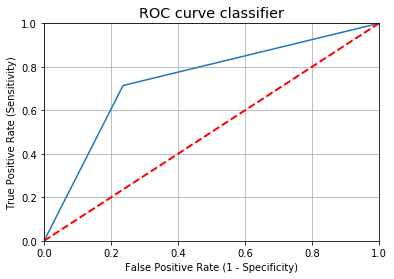

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#get of the ROC plot that is underneath the curve
# AUC is useful as a single number summary of classifier performance
# Higher value = better classifier
# AUC is useful even when there is high class imbalance (unlike classification accuracy)
# AUC is the percentage
# IMPORTANT: first argument is true values, second argument is predicted probabilities

print(metrics.roc_auc_score(y_test, pred))

In [71]:
#check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns

vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

                     feature       VIF
0                      price  3.602535
1                 resid_area  2.901708
2                   air_qual  8.619190
3                   room_num  2.053306
4                        age  2.931952
5                   teachers  1.595437
6                  poor_prop  3.662854
7                    airport  1.083458
8                 n_hos_beds  1.046567
9                n_hot_rooms  1.023323
10                  rainfall  1.025346
11                     parks  6.273327
12                  avg_dist  3.508939
13  waterbody_Lake and River  1.031380
14            waterbody_None  1.025383
15           waterbody_River  1.024509


In [72]:
import statsmodels.api as sm
x_train_sm = x_train
 
x_train_sm = sm.add_constant(x_train_sm)

glm1 = sm.OLS(y_train,x_train_sm).fit()

glm1.params

print(glm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Sold_YES   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     4.435
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           5.57e-08
Time:                        09:36:14   Log-Likelihood:                -222.54
No. Observations:                 354   AIC:                             479.1
Df Residuals:                     337   BIC:                             544.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\mrspider\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
result.params
result.predict(x_train)
result.predict((x_train) >= 0.5).astype(int)
result.pred_table()
  
result.summary()


Optimization terminated successfully.
         Current function value: inf
         Iterations 6


C:\Users\mrspider\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\mrspider\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\mrspider\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Sold_YES   No. Observations:                  354
Model:                          Logit   Df Residuals:                      338
Method:                           MLE   Df Model:                           15
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                     inf
Time:                        09:36:15   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
price                       -2.0830      0.333     -6.256      0.000      -2.736      -1.430
resid_area                   0.2158      0.200      1.080      0.280      -0.176       0.607
air_qual                    -0.8735      0.353     -2.476      0.013      -1.565      -0.182
room_num                     0.7600      0.213      3.569      0.000       0.343       1.177
age                         -0.0287      0.213     -0.135      0.893      -0.446       0.389
teachers                     0.5991      0.162      3.706      0.000       0.282       0.916
poor_prop                   -1.2411      0.280     -4.431      0.000      -1.790      -0.692
airport                     -0.0670      0.122     -0.549      0.583      -0.306       0.172
n_hos_beds                   0.2216      0.120      1.849      0.064      -0.013       0.456
n_hot_rooms                 -0.1970      0.209     -0.944      0.345      -0.606       0.212
rainfall                    -0.1331      0.122     -1.088      0.277      -0.373       0.107
parks                        0.3825      0.297      1.286      0.198      -0.200       0.965
avg_dist                    -0.6651      0.233     -2.858      0.004      -1.121      -0.209
waterbody_Lake and River    -0.3849      0.314     -1.226      0.220      -1.000       0.231
waterbody_None              -0.2967      0.216     -1.377      0.169      -0.719       0.126
waterbody_River              0.0156      0.202      0.077      0.938      -0.380       0.411
============================================================================================
"""

In [74]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                   Logit               Pseudo R-squared:    inf   
Dependent Variable:      Sold_YES            AIC:                 inf   
Date:                    2020-11-23 09:36    BIC:                 inf   
No. Observations:        354                 Log-Likelihood:      -inf  
Df Model:                15                  LL-Null:             0.0000
Df Residuals:            338                 LLR p-value:         1.0000
Converged:               1.0000              Scale:               1.0000
No. Iterations:          6.0000                                         
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
price                    -2.0830   0.3330 -6.2557 0.0000 -2.7356 -1.4304
resid_area                0.2158   0.1998  1.0797 0.2803 -0.1759  0.6074
air_qual                 -0.8735   0.3527 -2.4764 0.0133 -1.5648 -0.1822
room_num                  0.7600   0.2129  3.5692 0.0004  0.3426  1.1773
age                      -0.0287   0.2131 -0.1346 0.8929 -0.4463  0.3890
teachers                  0.5991   0.1617  3.7063 0.0002  0.2823  0.9160
poor_prop                -1.2411   0.2801 -4.4306 0.0000 -1.7901 -0.6921
airport                  -0.0670   0.1220 -0.5490 0.5830 -0.3061  0.1722
n_hos_beds                0.2216   0.1198  1.8494 0.0644 -0.0133  0.4564
n_hot_rooms              -0.1970   0.2087 -0.9439 0.3452 -0.6061  0.2121
rainfall                 -0.1331   0.1223 -1.0877 0.2767 -0.3728  0.1067
parks                     0.3825   0.2974  1.2861 0.1984 -0.2004  0.9654
avg_dist                 -0.6651   0.2327 -2.8580 0.0043 -1.1213 -0.2090
waterbody_Lake and River -0.3849   0.3140 -1.2255 0.2204 -1.0004  0.2306
waterbody_None           -0.2967   0.2155 -1.3767 0.1686 -0.7191  0.1257
waterbody_River           0.0156   0.2017  0.0775 0.9382 -0.3796  0.4109
========================================================================

"""

In [75]:
A_master.columns

Index(['price', 'resid_area', 'air_qual', 'room_num', 'age', 'teachers',
       'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms', 'rainfall',
       'parks', 'avg_dist', 'waterbody_Lake and River', 'waterbody_None',
       'waterbody_River', 'Sold_YES'],
      dtype='object')

In [76]:
# Putting feature variable to X
x = A_master[['price', 'resid_area', 'air_qual', 'room_num', 'teachers',
       'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms', 'rainfall',
       'parks', 'avg_dist', 'waterbody_Lake and River', 'waterbody_None']]

# Putting response variable to y
y = A_master['Sold_YES']

import statsmodels.api as sm
x_train_sm = x
 
x_train_sm = sm.add_constant(x_train_sm)

glm1 = sm.OLS(y,x_train_sm).fit()

glm1.params

print(glm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Sold_YES   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     9.340
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           2.10e-18
Time:                        09:36:16   Log-Likelihood:                -305.41
No. Observations:                 506   AIC:                             640.8
Df Residuals:                     491   BIC:                             704.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\mrspider\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [77]:
# Putting feature variable to X
x1 = A_master[['price', 'resid_area', 'air_qual', 'room_num', 'teachers',
       'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms', 
       'parks', 'avg_dist', 'waterbody_Lake and River', 'waterbody_None']]

# Putting response variable to y
y = A_master['Sold_YES']

import statsmodels.api as sm
x_train_sm = x1
 
x_train_sm = sm.add_constant(x_train_sm)

glm1 = sm.OLS(y,x_train_sm).fit()

glm1.params

print(glm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Sold_YES   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     10.05
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           7.23e-19
Time:                        09:36:16   Log-Likelihood:                -305.54
No. Observations:                 506   AIC:                             639.1
Df Residuals:                     492   BIC:                             698.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [78]:
# Putting feature variable to X
x2 = A_master[['price', 'resid_area', 'air_qual', 'room_num', 'teachers',
       'poor_prop', 'airport', 'n_hos_beds', 'n_hot_rooms',
       'parks', 'avg_dist', 'waterbody_Lake and River']]

# Putting response variable to y
y = A_master['Sold_YES']

import statsmodels.api as sm
x_train_sm = x2
 
x_train_sm = sm.add_constant(x_train_sm)

glm1 = sm.OLS(y,x_train_sm).fit()

glm1.params

print(glm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Sold_YES   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     10.91
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           2.18e-19
Time:                        09:36:16   Log-Likelihood:                -305.57
No. Observations:                 506   AIC:                             637.1
Df Residuals:                     493   BIC:                             692.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
# Putting feature variable to X
x3 = A_master[['price', 'air_qual', 'room_num', 'teachers',
       'poor_prop',  
        'avg_dist']]

# Putting response variable to y
y = A_master['Sold_YES']

import statsmodels.api as sm
x_train_sm = x3
 
x_train_sm = sm.add_constant(x_train_sm)

glm1 = sm.OLS(y,x_train_sm).fit()

glm1.params

print(glm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Sold_YES   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     19.61
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.36e-20
Time:                        09:36:16   Log-Likelihood:                -311.59
No. Observations:                 506   AIC:                             637.2
Df Residuals:                     499   BIC:                             666.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4545      0.020     22.669      0.0

In [80]:
#check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = x3.columns

vif_data["VIF"] = [variance_inflation_factor(x3.values, i) 
                          for i in range(len(x3.columns))] 
  
print(vif_data)

     feature       VIF
0      price  3.469501
1   air_qual  3.075936
2   room_num  2.044908
3   teachers  1.427819
4  poor_prop  3.097100
5   avg_dist  2.812317
